# Сборный проект

**Входные данные** —  исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы до 2016 года.

**Дальнейшее использование результатов исследования** —  выявление потенциально популярных продуктов и планирование рекламных кампаний

**Цель исследования** - выявить определяющие успешность игры закономерности.

1. Анализ данных: 
    - сколько игр выпускалось в разные годы. 
    - как менялись продажи по платформам, распределение по годам для платформ с наибольшими суммарными продажами
    - характерный срок жизни платформы
    - положение платформ-лидиров по продажам, выбор потенциально прибыльных платформ
    - продажи игр в разбивке по платформам
    - влияние на продажи внутри одной популярной платформы отзывы пользователей и критиков
    - общее распределение игр по жанрам, продажи игр разных жанров


2. Портрет пользователя каждого региона в разрезе:
    - платформ (топ-5)
    - жанров (топ-5)
    - рейтинга ESRB


3. Проверка гипотез: 
    - средние пользовательские рейтинги платформ Xbox One и PC одинаковые
    - средние пользовательские рейтинги жанров Action и Sports разные

## Функции и библиотеки

In [1]:
import pandas as pd

import matplotlib.pyplot as plt

import numpy as np

from scipy import stats as st

## Обзор данных

**Описание данных**

- Name — название игры
- Platform — платформа
- Year_of_Release — год выпуска
- Genre — жанр игры
- NA_sales — продажи в Северной Америке (миллионы проданных копий)
- EU_sales — продажи в Европе (миллионы проданных копий)
- JP_sales — продажи в Японии (миллионы проданных копий)
- Other_sales — продажи в других странах (миллионы проданных копий)
- Critic_Score — оценка критиков (максимум 100)
- User_Score — оценка пользователей (максимум 10)
- Rating — рейтинг от организации ESRB (англ. Entertainment Software Rating Board). Эта ассоциация определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию.

In [2]:
try:
    df = pd.read_csv ('D:/Data for projects/Games_csv.csv')
except: #метод try/except применяется для открытия блокнота по адресу Практикума
    df_calls = pd.read_csv ('/datasets/Games csv.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
Name               16713 non-null object
Platform           16715 non-null object
Year_of_Release    16446 non-null float64
Genre              16713 non-null object
NA_sales           16715 non-null float64
EU_sales           16715 non-null float64
JP_sales           16715 non-null float64
Other_sales        16715 non-null float64
Critic_Score       8137 non-null float64
User_Score         10014 non-null object
Rating             9949 non-null object
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


<div style="border:solid blue 2px; padding: 20px">
    
Обзор показал наличие следующих проблем в данных:
    
в части **названий столбцов**
    
    - наличие букв верхнего регистра в названии:
        - Name
        - Platform
        - Year_of_Release
        - Genre
        - NA_sales
        - EU_sales
        - JP_sales
        - Other_sales
        - Critic_Score
        - User_Score
        - Rating
        
в части **типов данных**
    
    - тип данных object вместо float в столбцах:
        - User_Score

в части **пропущенных значений**
    
    - пропуски данных в столбцах:
        - Name
        - Year_of_Release
        - Critic_Score
        - User_Score
        - Rating
    

### Уникальные значения в столбцах

In [4]:
df.nunique()

Name               11559
Platform              31
Year_of_Release       37
Genre                 12
NA_sales             402
EU_sales             307
JP_sales             244
Other_sales          155
Critic_Score          82
User_Score            96
Rating                 8
dtype: int64

In [5]:
for _ in ['Platform','Genre']: #цикл проходит по столбцам 'Platform','Genre'
    print (df[_].value_counts(), #выводим уникальные значения
           '\n')

PS2     2161
DS      2151
PS3     1331
Wii     1320
X360    1262
PSP     1209
PS      1197
PC       974
XB       824
GBA      822
GC       556
3DS      520
PSV      430
PS4      392
N64      319
XOne     247
SNES     239
SAT      173
WiiU     147
2600     133
GB        98
NES       98
DC        52
GEN       29
NG        12
WS         6
SCD        6
3DO        3
TG16       2
GG         1
PCFX       1
Name: Platform, dtype: int64 

Action          3369
Sports          2348
Misc            1750
Role-Playing    1498
Shooter         1323
Adventure       1303
Racing          1249
Platform         888
Simulation       873
Fighting         849
Strategy         683
Puzzle           580
Name: Genre, dtype: int64 



In [6]:
for _ in ['Critic_Score', 'User_Score', 'Rating']: #цикл проходит по столбцам 'Critic_Score', 'User_Score', 'Rating'
    print (df[_].value_counts(), #выводим уникальные значения
           '\n')

70.0    256
71.0    254
75.0    245
78.0    240
73.0    238
       ... 
20.0      3
17.0      1
22.0      1
13.0      1
21.0      1
Name: Critic_Score, Length: 82, dtype: int64 

tbd    2424
7.8     324
8       290
8.2     282
8.3     254
       ... 
2.3       2
1.5       2
1         2
9.7       1
0         1
Name: User_Score, Length: 96, dtype: int64 

E       3990
T       2961
M       1563
E10+    1420
EC         8
K-A        3
RP         3
AO         1
Name: Rating, dtype: int64 



<div style="border:solid blue 2px; padding: 20px">
    
Обзор показал наличие следующих проблем в данных:
    
    - различное наименование одного семейства платформ - (PS,PS2,PS3,PS4), (XB,X360,XOne) что может не являться проблемой и зависит от того, предусмотрен ли разработчиком режим совместимости игр для данных платформ
    - не полное наименование - 2600 вместо Atari 2600
    - оценка tbd в столбце User_Score (по всей видимости абревиатура означает 'to be determined' и соответствует отсутствию оценки)

### Дубликаты

In [7]:
df.duplicated().sum()

0

<div style="border:solid blue 2px; padding: 20px">
    
**Обзор явных дубликатов** показал их отсутствие

## Предобработка данных

### Наименования столбцов

In [8]:
df = df.rename(columns={'Name': 'name', 
                        'Platform': 'platform', 
                        'Year_of_Release': 'year_of_release',
                        'Genre':'genre',
                        'NA_sales':'na_sales',
                        'EU_sales':'eu_sales',
                        'JP_sales':'jp_sales',
                        'Other_sales':'other_sales',
                        'Critic_Score':'critic_score',
                        'User_Score':'user_score',
                        'Rating':'rating',
                       })
df.columns #проверка

Index(['name', 'platform', 'year_of_release', 'genre', 'na_sales', 'eu_sales',
       'jp_sales', 'other_sales', 'critic_score', 'user_score', 'rating'],
      dtype='object')

### Пропуски значений

пропуски данных выявлены в столбцах:

    - Name
    - Year_of_Release
    - Critic_Score
    - User_Score
    - Rating

In [9]:
for _ in ['name', 'year_of_release', 'critic_score', 'user_score', 'rating']:
    #display(df[df[_].isna()].head())
    print (f'доля пропусков в столбце {_} от общего объема данных {round(df[_].isna().sum()/len(df)*100,3)}%') #процент пропусков от общего объема данных

доля пропусков в столбце name от общего объема данных 0.012%
доля пропусков в столбце year_of_release от общего объема данных 1.609%
доля пропусков в столбце critic_score от общего объема данных 51.319%
доля пропусков в столбце user_score от общего объема данных 40.09%
доля пропусков в столбце rating от общего объема данных 40.479%


In [10]:
#display(df[df['user_score'] == 'tbd'])
print ('доля значений tbd в столбце user_score от общего объема данных', round(df.query('user_score == "tbd"')['user_score'].count()/len(df)*100,3),'%')

доля значений tbd в столбце user_score от общего объема данных 14.502 %


In [11]:
df[df['critic_score'].isna()].query(f'year_of_release > 2011')['year_of_release'].value_counts()

2015.0    381
2012.0    332
2014.0    320
2013.0    271
2016.0    270
Name: year_of_release, dtype: int64

In [12]:
df[df['user_score'].isna()].query(f'year_of_release > 2011')['year_of_release'].value_counts()

2012.0    290
2015.0    271
2014.0    231
2013.0    225
2016.0    206
Name: year_of_release, dtype: int64

In [13]:
df[df['rating'].isna()].query(f'year_of_release > 2011')['year_of_release'].value_counts()

2012.0    298
2015.0    291
2014.0    236
2013.0    228
2016.0    222
Name: year_of_release, dtype: int64

<div style="border:solid blue 2px; padding: 20px">
    
    
исключим пропуски в столбце **name** (количество пропусков статистически не значимо и ими можно пренебречь)
    
заполним пропуски в столбце **year_of_release**, количество пропусков статистически не значимо и ими можно пренебречь,однако можно заполнить данные из открытых источников или заполнить медианными значениями (в рамках платформы)
    
рассмотрим возможность заполнения пропусков в столбцах **critic_score, user_score, rating** медианными значениями (с учетом платформ и жанров), в случае отсутсвия такой возможности оставим данные пропуски без изменений

#### столбец name

In [14]:
df = df[df['name'].isna() == False] #устраняем пропуски в столбце name

df['name'].isna().sum() #проверка

0

#### столбец year_of_release

In [15]:
df[df['year_of_release'].isna()]['name'].value_counts()

LEGO Harry Potter: Years 5-7                    7
Rock Band                                       4
Happy Feet Two                                  4
Test Drive Unlimited 2                          3
Bejeweled 3                                     3
                                               ..
Luxor: Pharaoh's Challenge                      1
Sonic the Hedgehog                              1
Prinny: Can I Really Be The Hero? (US sales)    1
Face Racers: Photo Finish                       1
Clockwork Empires                               1
Name: name, Length: 232, dtype: int64

In [16]:
for _ in df[df['year_of_release'].isna()]['platform'].unique(): #цикл проходит по наименованиям платформ с играми с пропусками в столбце year_of_releas
    median_year = df[df['year_of_release'].isna() == False].query('platform == @_')['year_of_release'].median().copy() # расчет медианного года релиза игр для платформы
       
    for i in df[(df['platform'] == _) & (df['year_of_release'].isna())].index: # цикл проходит по индексам с пропусками в столбце year_of_releas
        df.loc[i,'year_of_release'] = median_year #заполнение пропусков медианными значениями
    
df['year_of_release'].isna().sum() #проверка

0

#### столбцы critic_score, user_score, rating

In [17]:
df['critic_score'].isna().sum()

8576

df_group = df.groupby(by=['platform','genre']).median().copy()
df_check = df[df['critic_score'].isna()].loc[:,['platform','genre']].copy()

for _ in df.query(f'critic_score.isna()').index:
    for i in df_check.index:
        df.loc[_,'critic_score'] = df_group.loc[df_check.loc[i]['platform'],df_check.loc[i]['genre']]['critic_score']

<div style="border:solid blue 2px; padding: 20px">
    
приведенный выше код производит замену оценки на медианное в рамках одной платформы и жанра, однако для его исполнения требуется большое количество вычислительных ресурсов, в следствии чего оставим данные пропуски данных без изменений (аналогично поступим с пропусками данных в столбцах user_score, rating)

### Категорирование данных

#### суммарные продажи по всем регионам

In [24]:
df['total_sales'] = df.eval(f'na_sales + eu_sales + jp_sales + other_sales')

## Анализ данных

### Выпуск игр по годам

Text(0.5, 0, 'год релиза')

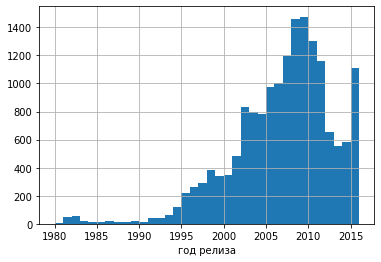

In [25]:
df['year_of_release'].hist(bins=36,range=(1980,2016)).set_xlabel('год релиза')

### Динамика продаж по годам в разрезе платформ

Text(0, 0.5, 'совокупные продажи')

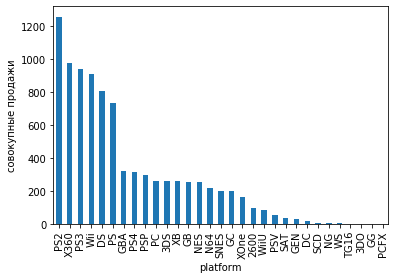

In [26]:
df.groupby(by='platform')['total_sales'].sum().sort_values(ascending=False).plot(kind='bar').set_ylabel('совокупные продажи')

In [27]:
top_6_platforms = df.groupby(by='platform')['total_sales'].sum().sort_values(ascending=False).head(6).index #топ 6 платформ с наибольшими продажами

Динамика продаж по годам для топ 6 платформ (по совокупным продажам)

Text(0, 0.5, 'total_sales')

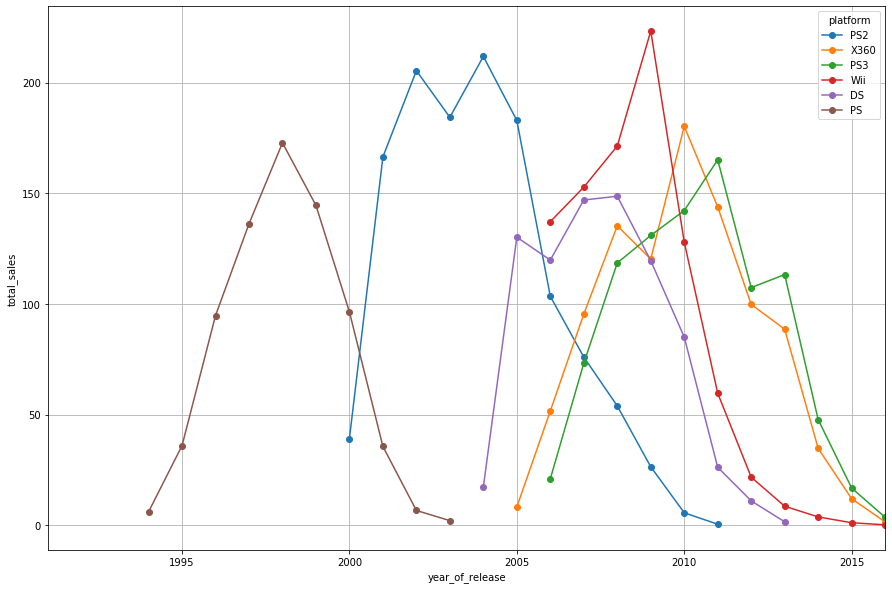

In [28]:
df.pivot_table(index=['year_of_release'], columns='platform', values='total_sales', aggfunc='sum').filter(top_6_platforms).plot(style='o-',
                                                                                                                                figsize=(15,10),
                                                                                                                                xlim=(1991,2016),
                                                                                                                                grid=True).set_ylabel('total_sales')

<div style="border:solid blue 2px; padding: 20px">
    
характерный "срок жизни" платформ составляет ~10 лет
    

### Определние актуального периода для построения прогноза на 2017 год

При определениии актуального периода будем исходить из целей данного исследования, так дальнейшее использование его результатов предполагает выявление потенциально популярных продуктов, что в свою очередь означает, что **при выборе актуального периода мы будем ориентроваться на платформы, жизненный цикл которых не достиг точки их пика популярности**, что судя по графикам **составляет 4-5 лет**

In [29]:
df_valid_period = df[df['year_of_release'] > 2010].copy()

### Динамика продаж платформ-лидеров

Text(0, 0.5, 'total_sales')

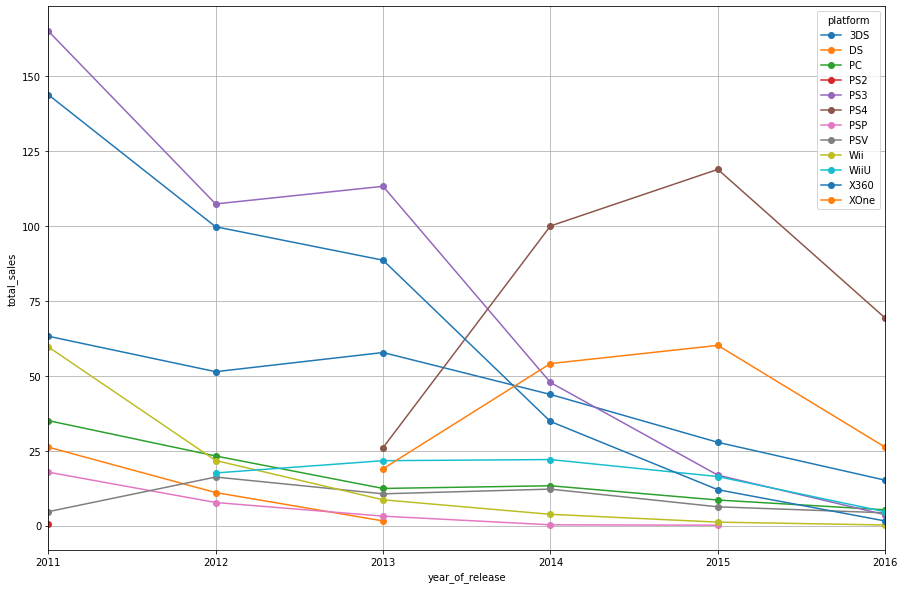

In [30]:
df_valid_period.pivot_table(index=['year_of_release'], columns='platform', values='total_sales', aggfunc='sum').plot(style='o-',
                                                                                                                     figsize=(15,10),
                                                                                                                     xlim=(2011,2016),
                                                                                                                     grid=True,
                                                                                                                    ).set_ylabel('total_sales')

In [31]:
df_valid_period.query(f'platform in ["PS4","XOne","3DS"]').groupby(by=['platform','year_of_release'])['total_sales'].sum() 

platform  year_of_release
3DS       2011.0              63.20
          2012.0              51.36
          2013.0              57.76
          2014.0              43.76
          2015.0              27.78
          2016.0              15.14
PS4       2013.0              25.99
          2014.0             100.00
          2015.0             118.90
          2016.0              69.25
XOne      2013.0              18.96
          2014.0              54.07
          2015.0              60.14
          2016.0              26.15
Name: total_sales, dtype: float64

In [32]:
df_valid_period.groupby('platform')['total_sales'].describe()

,count,mean,std,min,25%,50%,75%,max
platform,,,,,,,,
3DS,520.0,0.498077,1.430876,0.01,0.0500,0.120,0.3300,14.60
DS,184.0,0.210489,0.636579,0.01,0.0375,0.080,0.1625,8.06
PC,389.0,0.251105,0.505710,0.01,0.0300,0.080,0.2400,5.14
PS2,7.0,0.064286,0.042762,0.01,0.0350,0.060,0.0900,0.13
PS3,733.0,0.619209,1.429129,0.01,0.0700,0.210,0.6300,21.05
PS4,392.0,0.801378,1.609456,0.01,0.0600,0.200,0.7300,14.63
PSP,312.0,0.092981,0.116731,0.01,0.0200,0.040,0.1200,0.87
PSV,430.0,0.125744,0.212193,0.01,0.0200,0.055,0.1300,1.96
Wii,197.0,0.482335,1.059069,0.01,0.0900,0.170,0.3900,10.12


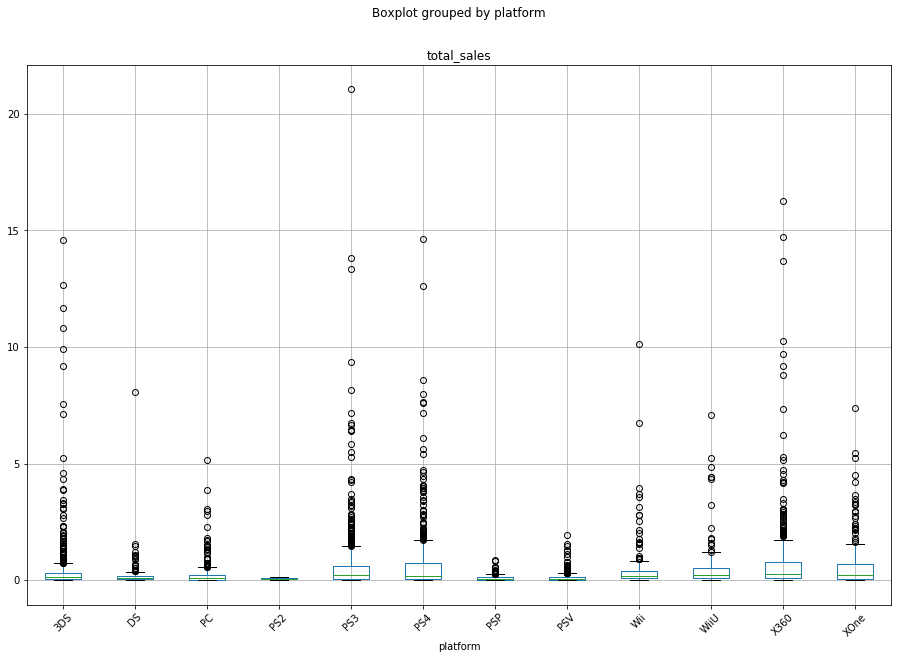

In [33]:
df_valid_period.boxplot(column='total_sales', 
                        by='platform',
                        rot=45, 
                        figsize=(15,10))

### Влияние на продажи отзывов пользователей и критиков

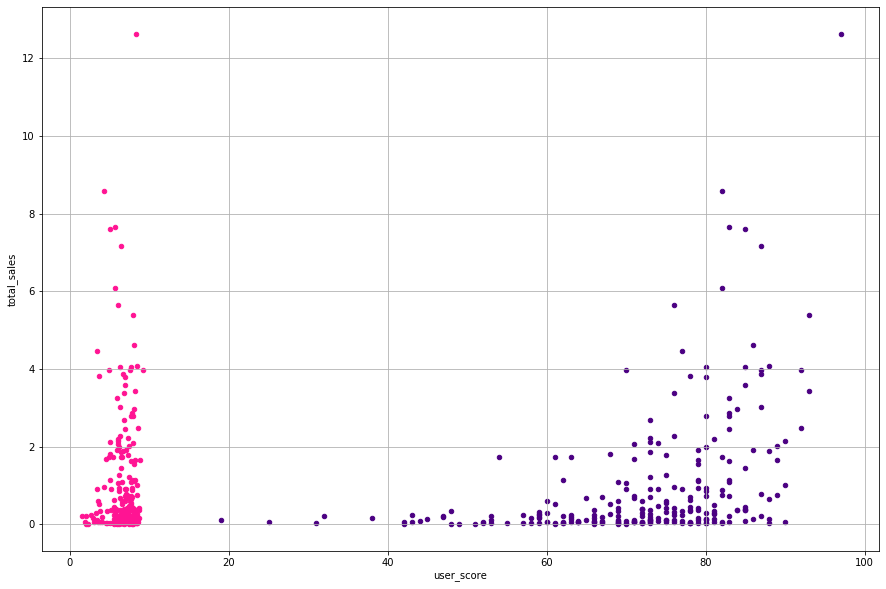

In [49]:
df_valid_period_filltered = df_valid_period[df_valid_period['user_score'] != "tbd" ]

df_valid_period_filltered.loc[:,'user_score'] = df_valid_period_filltered['user_score'].apply(float)


ax = df_valid_period_filltered.query(f'platform == "PS4"').plot(x='critic_score', 
                                                                y='total_sales',
                                                                kind='scatter',
                                                               color='Indigo')

df_valid_period_filltered.query(f'(platform == "PS4")').plot(x='user_score', 
                                                             y='total_sales',
                                                             kind='scatter', 
                                                             legend=True, 
                                                             grid=True,
                                                             figsize=(15,10),
                                                             color='DeepPink',
                                                             ax=ax)


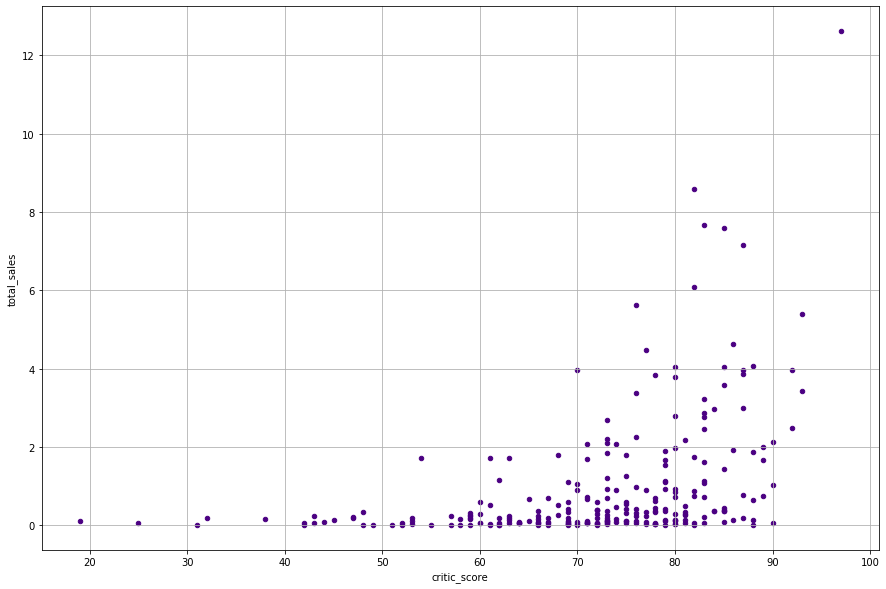

In [35]:
df_valid_period_filltered.query(f'platform == "PS4"').plot(x='critic_score', 
                                                                y='total_sales',
                                                                kind='scatter',
                                                               color='Indigo', 
                                                           grid=True,
                                                          figsize=(15,10))

In [36]:
df_valid_period_filltered.query(f'platform == "PS4"').loc[:,['total_sales','user_score']].corr() #корреляция между total_sales и user_score

,total_sales,user_score
total_sales,1.000000,-0.031957
user_score,-0.031957,1.000000


In [37]:
df_valid_period_filltered.query(f'platform == "PS4"').loc[:,['total_sales','critic_score']].corr() #корреляция между total_sales и critic_score

,total_sales,critic_score
total_sales,1.000000,0.406469
critic_score,0.406469,1.000000


<div style="border:solid blue 2px; padding: 20px">
    
в рамках платформы PS4 выявлена:
    
- слабая корреляция между total_sales и user_score
- более сильная корреляция между total_sales и critic_score (однако все равно не достаточная)

в связи с вышеизложенным рассмотрим корреляцию пожанрово

In [38]:
df_valid_period_filltered_PS4 = df_valid_period_filltered.query(f'platform == "PS4"') #фильтр по платформе PS4

for _ in df_valid_period_filltered['genre'].unique(): #цикл проходит по жанрам
    print(_)
    display(df_valid_period_filltered_PS4.query('genre == @_').loc[:,['total_sales','user_score']].corr()) #корреляция между total_sales и user_score
    print()

Action


,total_sales,user_score
total_sales,1.000000,0.143755
user_score,0.143755,1.000000



Shooter


,total_sales,user_score
total_sales,1.000000,-0.185363
user_score,-0.185363,1.000000



Role-Playing


,total_sales,user_score
total_sales,1.000000,0.026905
user_score,0.026905,1.000000



Racing


,total_sales,user_score
total_sales,1.000000,-0.342443
user_score,-0.342443,1.000000



Platform


,total_sales,user_score
total_sales,1.000000,0.396737
user_score,0.396737,1.000000



Misc


,total_sales,user_score
total_sales,1.000000,-0.303129
user_score,-0.303129,1.000000



Simulation


,total_sales,user_score
total_sales,1.0,1.0
user_score,1.0,1.0



Sports


,total_sales,user_score
total_sales,1.000000,-0.010471
user_score,-0.010471,1.000000



Fighting


,total_sales,user_score
total_sales,1.000000,0.015153
user_score,0.015153,1.000000



Adventure


,total_sales,user_score
total_sales,1.000000,0.285682
user_score,0.285682,1.000000



Puzzle


,total_sales,user_score
total_sales,NaN,NaN
user_score,NaN,NaN



Strategy


,total_sales,user_score
total_sales,1.000000,-0.839016
user_score,-0.839016,1.000000


In [39]:
for _ in df_valid_period_filltered['genre'].unique():
    print(_)
    display(df_valid_period_filltered_PS4.query('genre == @_').loc[:,['total_sales','critic_score']].corr()) #корреляция между total_sales и user_score
    print()

Action


,total_sales,critic_score
total_sales,1.000000,0.474373
critic_score,0.474373,1.000000



Shooter


,total_sales,critic_score
total_sales,1.000000,0.499112
critic_score,0.499112,1.000000



Role-Playing


,total_sales,critic_score
total_sales,1.000000,0.519442
critic_score,0.519442,1.000000



Racing


,total_sales,critic_score
total_sales,1.000000,0.092047
critic_score,0.092047,1.000000



Platform


,total_sales,critic_score
total_sales,1.000000,0.023142
critic_score,0.023142,1.000000



Misc


,total_sales,critic_score
total_sales,1.000000,0.418241
critic_score,0.418241,1.000000



Simulation


,total_sales,critic_score
total_sales,1.0,-1.0
critic_score,-1.0,1.0



Sports


,total_sales,critic_score
total_sales,1.000000,0.461849
critic_score,0.461849,1.000000



Fighting


,total_sales,critic_score
total_sales,1.000000,0.449359
critic_score,0.449359,1.000000



Adventure


,total_sales,critic_score
total_sales,1.000000,0.368621
critic_score,0.368621,1.000000



Puzzle


,total_sales,critic_score
total_sales,NaN,NaN
critic_score,NaN,NaN



Strategy


,total_sales,critic_score
total_sales,1.000000,-0.586122
critic_score,-0.586122,1.000000


<div style="border:solid blue 2px; padding: 20px">
    
в рамках пожанровой проверки для платформы PS4 выявлено:
    
- сильная (>0,8) корреляция между total_sales и user_score для:
    - Simulation
    - Strategy (корреляция отрицательна)
- значимая (>0,5) корреляция между total_sales и critic_score для:
    - Simulation (корреляция отрицательна)
    - Strategy (корреляция отрицательна)
    - Role-Playing

###  Распределение игр по жанрам, продажи в разрезе жанров

**распределение по жанрам**

Text(0, 0.5, 'count')

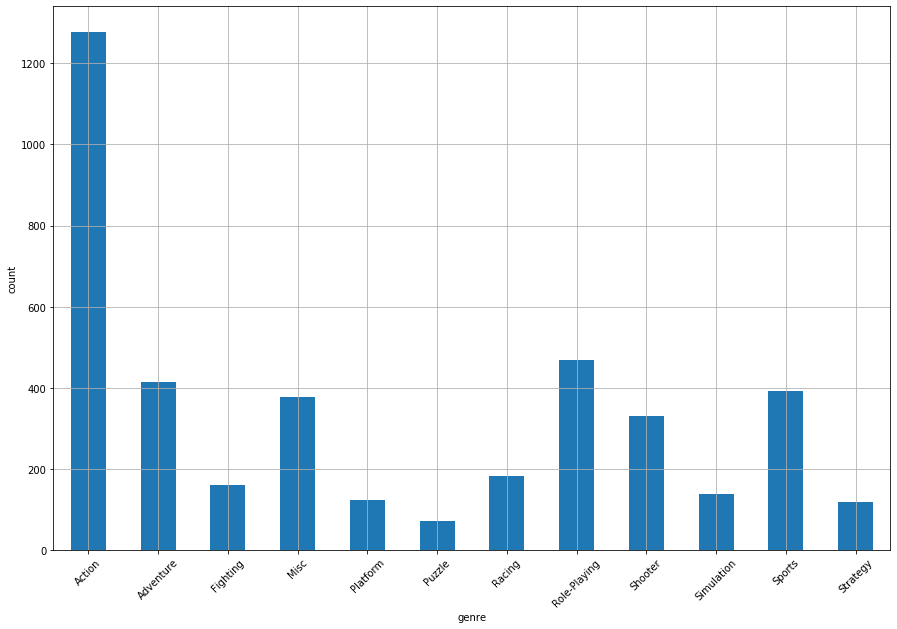

In [40]:
df_valid_period.groupby('genre')['total_sales'].count().plot(kind='bar',
                                                          grid=True,
                                                          figsize=(15,10),
                                                          rot=45).set_ylabel('count')

**продажи по жанрам**

Text(0, 0.5, 'total_sales')

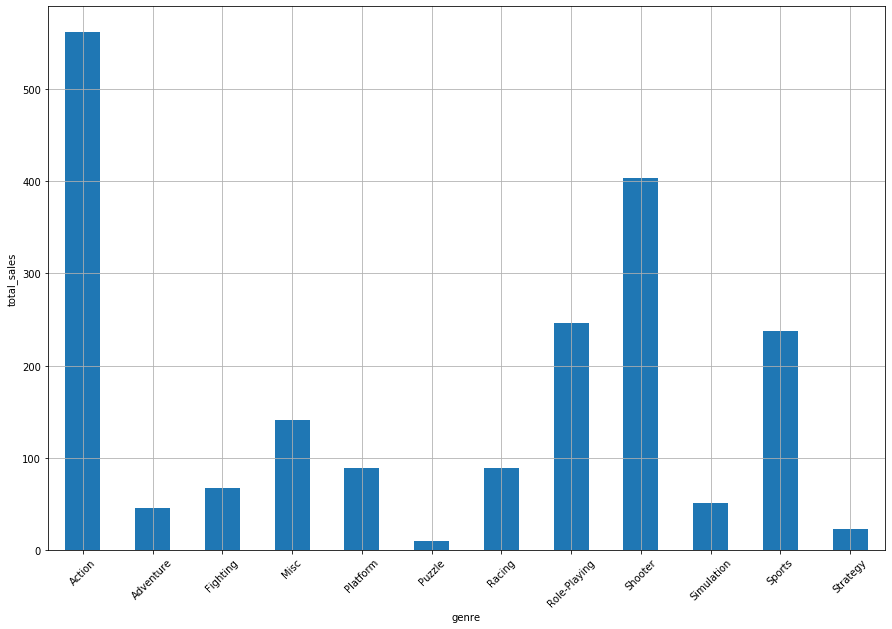

In [41]:
df_valid_period.groupby('genre')['total_sales'].sum().plot(kind='bar',
                                                          grid=True,
                                                          figsize=(15,10),
                                                          rot=45).set_ylabel('total_sales')

<div style="border:solid blue 2px; padding: 20px">
    
среди жанров-лидеров по продажам можно выделить:
    
    - Action
    - Shooter
    - Role-Playing
    - Sports

удельные продажи по жанрам (отношение продаж к колличеству игр в жанре)

Text(0, 0.5, 'total_sales')

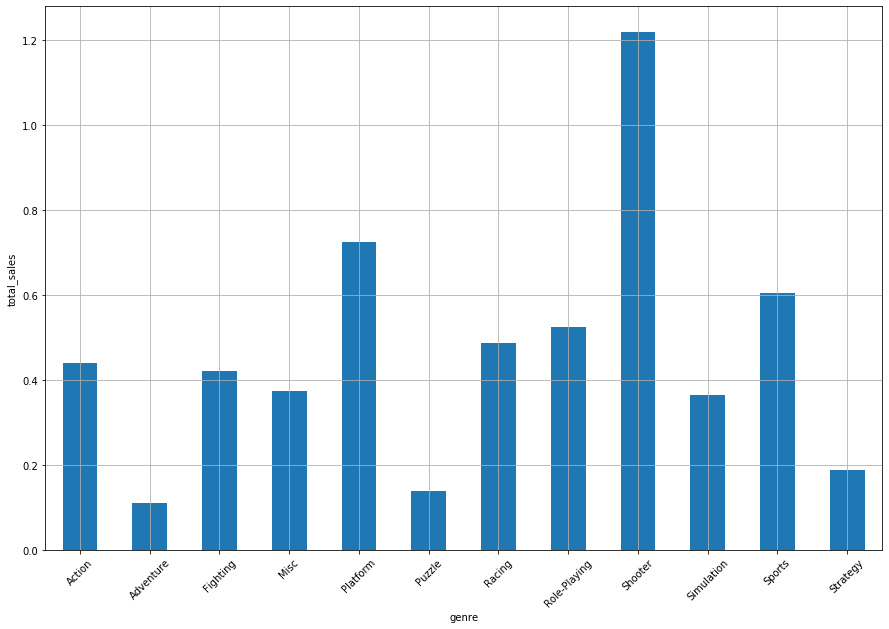

In [42]:
((df_valid_period.groupby('genre')['total_sales'].sum())/(df_valid_period.groupby('genre')['total_sales'].count())).plot(kind='bar',
                                                          grid=True,
                                                          figsize=(15,10),
                                                          rot=45).set_ylabel('total_sales')

<div style="border:solid blue 2px; padding: 20px">
    
среди жанров-лидеров по удельным продажам можно выделить:
    
    - Shooter
    - Platform
    - Sports

## Портрет пользователя для каждого региона

### Популярные платформы (топ-5)

na_sales


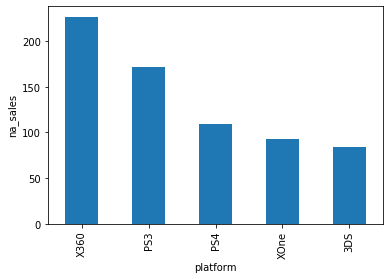

eu_sales


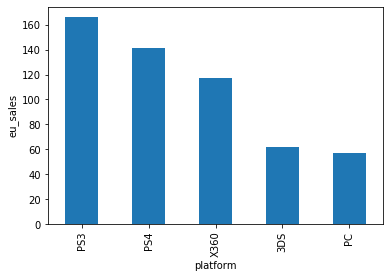

jp_sales


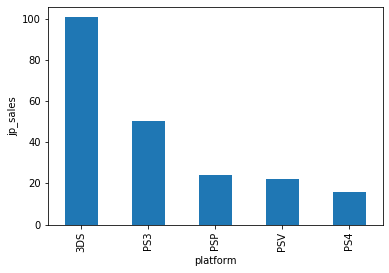

In [43]:
for _ in ['na_sales', 'eu_sales', 'jp_sales']:
    print(_)
    df_valid_period.groupby(by='platform')[_].sum().sort_values(ascending=False).head(5).plot(kind='bar').set_ylabel(_)
    plt.show()

<div style="border:solid blue 2px; padding: 20px">
    
наибольшая "монополизация" рынка характерная для Японии, при этом на Американском рынке платформы представленны наиболее равномерно, Европейский рынок представляет из себя промежуточный вариант
    
**Важно отметить то что список платформ-лидеров и их доли рынка не совпадают по регионам**

### Популярные жанры (топ-5)

na_sales


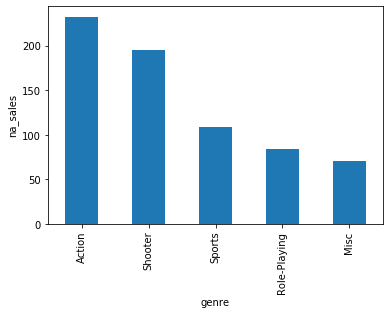

eu_sales


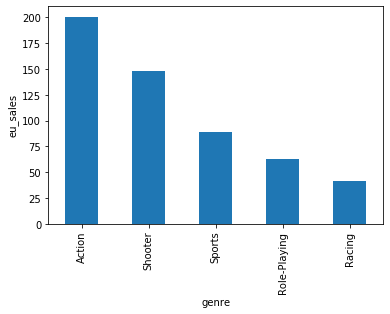

jp_sales


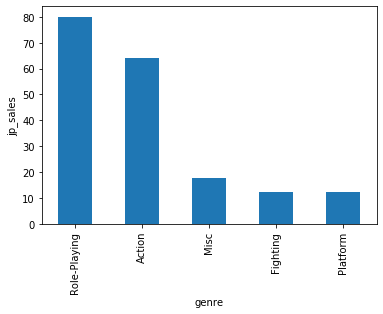

In [44]:
for _ in ['na_sales', 'eu_sales', 'jp_sales']:
    print(_)
    df_valid_period.groupby(by='genre')[_].sum().sort_values(ascending=False).head(5).plot(kind='bar').set_ylabel(_)
    plt.show()

<div style="border:solid blue 2px; padding: 20px">
    
в разрезе жанров рынки Америки и Европы схожи (за исключением жанров Misc и Racing), что можно объяснить высокой социо-культурной схожестью пользователей
    
при этом **предпочтения японских пользователей существенно отличаются**

### Влияние рейтинга ESRB на продажи в регионе

na_sales


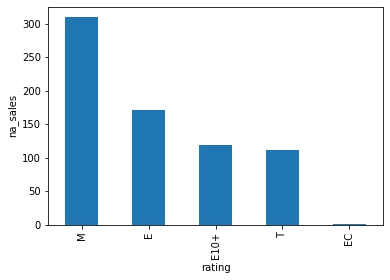

eu_sales


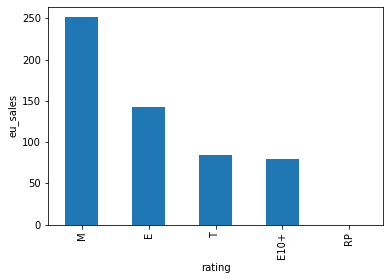

jp_sales


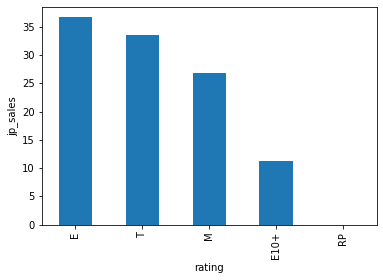

In [45]:
for _ in ['na_sales', 'eu_sales', 'jp_sales']:
    print(_)
    df_valid_period.groupby(by='rating')[_].sum().sort_values(ascending=False).head(5).plot(kind='bar').set_ylabel(_)
    plt.show()

<div style="border:solid blue 2px; padding: 20px">
    
в разрезе влияния рейтинга ESRB на продажи в рамках рынков Америки и Европы схожи, что так же можно объяснить высокой социо-культурной схожестью пользователей
    
при этом **предпочтения японских пользователей существенно отличаются**

## Проверка гипотез

### Средние пользовательские рейтинги платформ Xbox One и PC одинаковые

Н0: Средние пользовательские рейтинги платформ Xbox One и PC отличаются не существенно (Уровень значимости - 1%)

Н1: Средние пользовательские рейтинги платформ Xbox One и PC существенно отличаются (Уровень значимости - 1%)

In [46]:
ratio_XBox = df_valid_period.query(f'(platform == "X360")&(user_score != "tbd")')['user_score'].dropna()
ratio_PC = df_valid_period.query(f'(platform == "PC")&(user_score != "tbd")')['user_score'].dropna()

ratio_XBox = pd.to_numeric(ratio_XBox,errors='raise')
ratio_PC = pd.to_numeric(ratio_PC,errors='raise')


alpha = .01 # критический уровень статистической значимости

results = st.ttest_ind(
    ratio_XBox, 
    ratio_PC)

print('p-значение: ', results.pvalue)

if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу") 

p-значение:  0.3283822659693548
Не получилось отвергнуть нулевую гипотезу


<div style="border:solid blue 2px; padding: 20px">
    
Средние пользовательские рейтинги платформ Xbox One и PC отличаются не существенно

### Средние пользовательские рейтинги жанров Action и Sports разные

Н0: Средние пользовательские рейтинги жанров Action и Sports отличаются не существенно (Уровень значимости - 1%)

Н1: Средние пользовательские рейтинги жанров Action и Sports существенно отличаются (Уровень значимости - 1%)

In [47]:
ratio_Action = df_valid_period.query(f'(genre == "Action")&(user_score != "tbd")')['user_score'].dropna()
ratio_Sports = df_valid_period.query(f'(genre == "Sports")&(user_score != "tbd")')['user_score'].dropna()

ratio_Action = pd.to_numeric(ratio_Action,errors='raise')
ratio_Sports = pd.to_numeric(ratio_Sports,errors='raise')


alpha = .01 # критический уровень статистической значимости

results = st.ttest_ind(
    ratio_Action, 
    ratio_Sports)

print('p-значение: ', results.pvalue)

if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу") 

p-значение:  2.65939241959414e-24
Отвергаем нулевую гипотезу


<div style="border:solid blue 2px; padding: 20px">
    
Средние пользовательские рейтинги жанров Action и Sports существенно отличаются

## Заключение

В рамках текущего исследования рассмотрены исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы с целью выявления определяющие успешность игры закономерности.

В рамках анализа выпуска игр по годам, определено, что **характерный "срок жизни" платформ составляет 10 лет**
При этом важно учесть что для ряда платформ возможна совместимость игр и при выпуске нового покаления платформы лояльная пользовательская аудитория мигрирует на новую платформу (что при совместимости игр может отразиться на продажах, но не на внутриигровых тратах пользователей, находящихся вне рамок настоящего исследования) 

В рамках генеральной совокупности определен пул популярных платформ:
    - PS2
    - X360
    - PS3
    - Wii
    - DS
    - PS

**Для детального исследования выбран период в 5 лет**, включающий в себя популярные на текущий момент платформы




Для данного периода:
- **определен пул популярных платформ**:
    - PS4
    - X360
    - 3DS
    
    
- **исследовано влияние на продажи отзывов пользователей и критиков для наиболее популярной платформы (PS4)**, выявлена:
    - слабая корреляция между совокупными продажами и оценкой пользователей
    - более сильная корреляция между совокупными продажами и оценкой критиков (однако все равно не достаточная)
    - при пожанровом исследовании, выявлено:
        - сильная (>0,8) корреляция между total_sales и user_score для:
            - Simulation
            - Strategy (корреляция отрицательна)
        - значимая (>0,5) корреляция между total_sales и critic_score для:
            - Simulation (корреляция отрицательна)
            - Strategy (корреляция отрицательна)
            - Role-Playing
            
            
- **исследовано распределение игр по жанрам, продажи в разрезе жанров**, выявлено:
    - жанры-лидеры по продажам:
        - Action
        - Shooter
        - Role-Playing
        - Sports
    - жанры-лидеры по удельным продажам:
        - Shooter
        - Platform
        - Sports
        
        
- **исследованы портреты пользователей для каждого региона**, выявлено:
    - в части популярных платформ:
        - наибольшая "монополизация" рынка характерная для Японии, при этом на Американском рынке платформы представленны наиболее равномерно, Европейский рынок представляет из себя промежуточный вариант
     -  в части популярных жанров:
         - в разрезе жанров рынки Америки и Европы схожи (за исключением жанров Misc и Racing), что можно объяснить высокой социо-культурной схожестью пользователей, при этом предпочтения японских пользователей существенно отличаются
    - в части влияния рейтинга ESRB на продажи в регионе:
        - в разрезе влияния рейтинга ESRB на продажи в рамках рынков Америки и Европы схожи, что так же можно объяснить высокой социо-культурной схожестью пользователей, при этом предпочтения японских пользователей существенно отличаются


- **проверена гипотеза о равенстве средних пользовательских рейтингов платформ Xbox One и PC**, выявлено:
    - средние пользовательские рейтинги платформ Xbox One и PC отличаются не существенно


- **проверена гипотеза о равенстве средних пользовательских рейтингов жанров Action и Sports**, выявлено:
    - cредние пользовательские рейтинги жанров Action и Sports существенно отличаются
    
    
Из проведенного исследования в частности следует, что определяющие успешность игры закономерности разные для разных регионов, так при выявление потенциально популярных продуктов и планирование рекламных кампаний **необходимо учитывать существенные отличия предпочтений в азиатском регионе** как в части платформ, так и в части жанров.
В зависимости от выбранной стратегии **можно провести дополнительное исследование с целью определения высоко доходных ниш по регионам**, с целью фокусировки предложений в данных сегментах.
